<div style="text-align: center; padding: 20px; border-radius: 15px; background: linear-gradient(135deg, #1a1a2e, #16213e); color: white; font-family: 'Segoe UI', sans-serif;">

  <span style="font-size: 2em; font-weight: bold;">Proyecto Final</span>  
  <span style="color: #003D79; font-size: 1.5em;">Clasificación multiclase con QML</span>  

  <hr style="border: none; border-top: 1px solid #ddd; margin: 20px 0;">
  
  <span style="color: #D59F0F; font-size: 1.2em;">Universidad Nacional Autónoma de México</span>  
  <span style="color: #eb0b30; font-size: 1.5em;">Facultad de ingeniería</span>  

  <p style="font-size: 1em;">2958: Temas Selectos de Ingeniería en Computación III</p>
  <p style="font-weight: bold;">Computación Cuántica · 2025-2</p>

  <hr style="border: none; border-top: 1px solid #ddd; margin: 20px 0;">

  <table style="margin: 0 auto; border-collapse: collapse; font-size: 1em;">
    <tr>
      <th style="padding: 8px 16px; border-bottom: 1px solid #ccc;">Nombre</th>
      <th style="padding: 8px 16px; border-bottom: 1px solid #ccc;">Matrícula</th>
    </tr>
    <tr>
      <td style="padding: 8px 16px;">Garay Jacome Brandon</td>
      <td style="padding: 8px 16px;">[Matrícula 1]</td>
    </tr>
    <tr>
      <td style="padding: 8px 16px;">López Ortega Diego</td>
      <td style="padding: 8px 16px;">421058536</td>
    </tr>
    <tr>
      <td style="padding: 8px 16px;">Rosario Vázques José André</td>
      <td style="padding: 8px 16px;">[Matrícula 3]</td>
    </tr>
  </table>

</div>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $


# Instalación de dependencias (update/downgrade)

In [ ]:
# !pip uninstall -y qiskit qiskit-aer qiskit-terra qiskit-machine-learning

In [1]:
# !pip install qiskit==1.3.2
# !pip install qiskit-aer
# !pip install qiskit-machine-learning==0.8.0


# !pip install scikit-learn
# !pip install matplotlib

# !pip install imblearn

  Using cached qiskit-1.3.2-cp39-abi3-win_amd64.whl.metadata (13 kB)
Using cached qiskit-1.3.2-cp39-abi3-win_amd64.whl (6.5 MB)


  Using cached qiskit_aer-0.17.0-cp313-cp313-win_amd64.whl.metadata (8.4 kB)
Using cached qiskit_aer-0.17.0-cp313-cp313-win_amd64.whl (9.5 MB)


  Using cached qiskit_machine_learning-0.8.0-py3-none-any.whl.metadata (13 kB)
Using cached qiskit_machine_learning-0.8.0-py3-none-any.whl (237 kB)


In [1]:
import qiskit
import qiskit_machine_learning

print('Versión de Qiskit:                 ', qiskit.version.get_version_info())
print('Versión de Qiskit Machine Learning:', qiskit_machine_learning.version.get_version_info())

Versión de Qiskit:                  1.3.2
Versión de Qiskit Machine Learning: 0.8.0


# Imports

In [2]:
# Utilidades generales
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import clear_output

# Utilidades scikit-learn
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.preprocessing import OneHotEncoder

# Qiskit y Qiskit Machine Learning
import qiskit
import qiskit_machine_learning
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, PauliFeatureMap, EfficientSU2
from qiskit_aer import Aer
from qiskit_machine_learning.optimizers import COBYLA, L_BFGS_B, SPSA
from qiskit_machine_learning.utils.loss_functions import CrossEntropyLoss
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit import QuantumCircuit


import warnings
warnings.filterwarnings('ignore')

In [3]:
import urllib.request
import tempfile

style_url = "https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/refs/heads/main/themes/rose-pine-dawn.mplstyle"
try:
    with tempfile.TemporaryDirectory() as tmpdir:
        style_path = os.path.join(tmpdir, "rose-pine-dawn.mplstyle")
        urllib.request.urlretrieve(style_url, style_path)
        plt.style.use(style_path)
except:
    pass


# Preprocesamiento

In [4]:
# Cargar el dataset de vino
wine_data = load_wine()

# Separar características y etiquetas
X = wine_data.data
y = wine_data.target
feature_names = wine_data.feature_names
target_names = wine_data.target_names

# Mostrar estructura general
print("Número de muestras:", X.shape[0])
print("Número de características:", X.shape[1])
print("Características:", feature_names)
print("Clases:", list(target_names))
print("Distribución de clases:", pd.Series(y).value_counts().sort_index().to_dict())

# Crear DataFrame para exploración
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print("\nPrimeras filas del dataset:")
display(df.head())

Número de muestras: 178
Número de características: 13
Características: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Clases: [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]
Distribución de clases: {0: 59, 1: 71, 2: 48}

Primeras filas del dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
# Normalización de los datos
scaler = MinMaxScaler(feature_range=(0, 2*np.pi))
X_scaled = scaler.fit_transform(X)

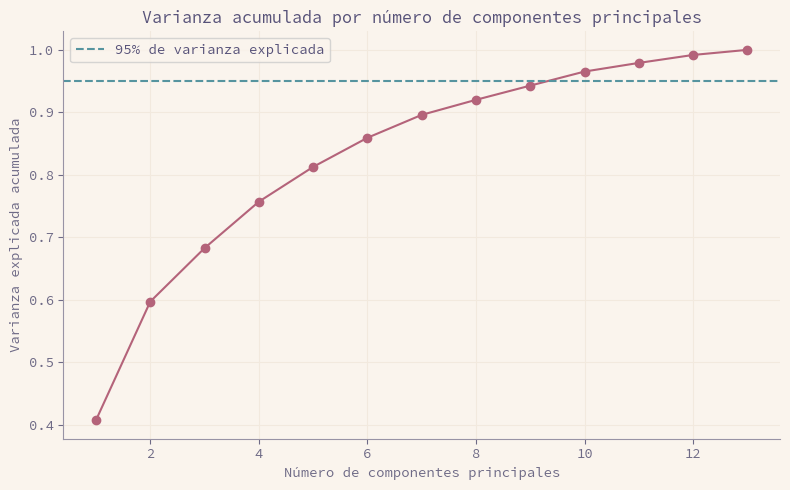

In [6]:
# PCA para ver la varianza acumulada
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

# Varianza explicada
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Gráfico de varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o')
plt.axhline(y=0.95, color='C4', linestyle='--', label='95% de varianza explicada')
plt.title('Varianza acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Definir cantidad de componentes a utilizar
pca_components = 4

# Aplicar PCA con n componentes principales
pca_n = PCA(n_components=pca_components)
X_pca = pca_n.fit_transform(X_scaled)

# Confirmar la nueva forma de los datos
print("Nueva forma de X_pca:", X_pca.shape)


Nueva forma de X_pca: (178, 4)


In [8]:
# # Dividir en entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(
#     X_pca, y, test_size=0.3, random_state=42, stratify=y
# )

# # Convertir las etiquetas a one-hot (requerido por cross-entropy)
# encoder = OneHotEncoder(sparse_output=False)
# y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
# y_test_encoded = encoder.transform(y_test.reshape(-1, 1))


# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# SMOTE sobre el conjunto de entrenamiento
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Formas después de SMOTE:", X_train_resampled.shape, y_train_resampled.shape)

# Codificación one-hot sobre etiquetas YA re-muestreadas
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

y_train_encoded = encoder.fit_transform(y_train_resampled.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

Formas después de SMOTE: (150, 4) (150,)


# Modelo

In [9]:
# Función de callback
def callback_graph(weights, loss_value):
    objective_func_vals.append(loss_value)
    clear_output(wait=True)
    print(f"Iteración: {len(objective_func_vals)}, Pérdida: {loss_value:.5f}")
    plt.plot(objective_func_vals)
    plt.title("Pérdida vs Iteración")
    plt.xlabel("Iteración")
    plt.ylabel("Pérdida")
    plt.grid(True)
    plt.show()

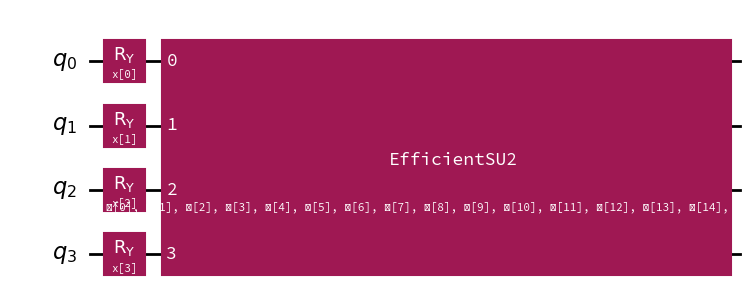

In [10]:
fm_reps = 2
ansatz_reps = 4
opt_iter = 300
ent_type = 'full'
lr = 0.02
c = 0.05

# Mapa de características y ansatz

# feature_map = ZZFeatureMap(feature_dimension=pca_components, reps=fm_reps, entanglement=ent_type)
#feature_map = PauliFeatureMap(feature_dimension=pca_components, reps=fm_reps, paulis=['Z', 'ZZ'], entanglement=ent_type)

from qiskit.circuit import ParameterVector

def create_angle_encoding_circuit(num_qubits):
    """Create a circuit that encodes features as rotation angles"""
    params = ParameterVector('x', num_qubits)
    qc = QuantumCircuit(num_qubits)
    
    # Encode each feature as a rotation around Y-axis
    for i in range(num_qubits):
        qc.ry(params[i], i)
    
    return qc
    
feature_map = create_angle_encoding_circuit(pca_components)

#ansatz = RealAmplitudes(num_qubits=pca_components, reps=ansatz_reps, entanglement=ent_type)
ansatz = EfficientSU2(num_qubits=pca_components, reps=ansatz_reps, entanglement=ent_type)

# Optimizador
optimizer = SPSA(maxiter=opt_iter)
# optimizer = SPSA(maxiter=opt_iter, learning_rate=lr, perturbation=c)
# optimizer = L_BFGS_B(maxiter=opt_iter)
# optimizer = COBYLA(maxiter=opt_iter)

# Instancia VQC
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    loss="cross_entropy",  
    optimizer=optimizer,
    callback=callback_graph
)

# Visualizar  el circuito
vqc.neural_network.circuit.draw('mpl')

# Entrenamiento

Iteración: 651, Pérdida: 1.11054


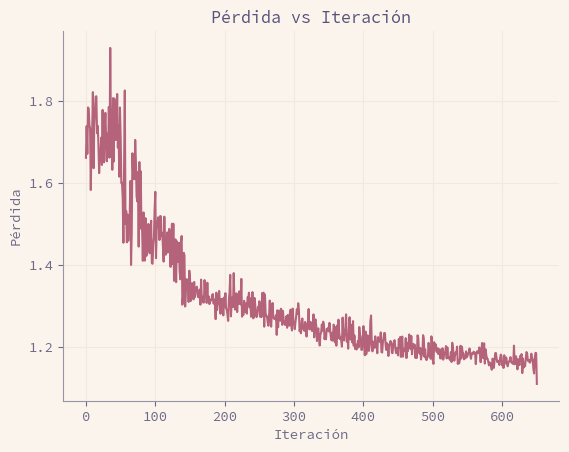


Exactitud de entrenamiento: 0.66


In [11]:
objective_func_vals = []

# Entrenar

# vqc.fit(X_train, y_train_encoded)
vqc.fit(X_train_resampled, y_train_encoded)

# Evaluar entrenamiento
train_accuracy = vqc.score(X_train_resampled, y_train_encoded)
print('\nExactitud de entrenamiento:',train_accuracy)

# Prueba

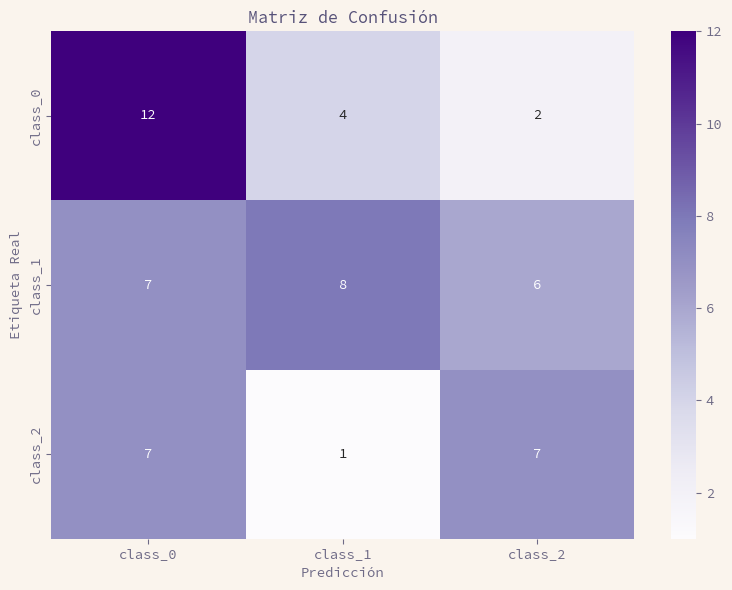

In [12]:
# 1. Obtener predicciones del modelo en datos de prueba
y_pred_encoded = vqc.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)  # Convertir de one-hot a índices de clase
y_test_indices = np.argmax(y_test_encoded, axis=1)  # Convertir etiquetas de prueba
test_accuracy = vqc.score(X_test, y_test_encoded)

# 2. Calcular matriz de confusión
cm = confusion_matrix(y_test_indices, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

In [13]:
# 3. Calcular métricas detalladas para cada clase
precision = precision_score(y_test_indices, y_pred, average=None)
recall = recall_score(y_test_indices, y_pred, average=None)
f1 = f1_score(y_test_indices, y_pred, average=None)

# Métricas promedio
precision_avg = precision_score(y_test_indices, y_pred, average='weighted')
recall_avg = recall_score(y_test_indices, y_pred, average='weighted')
f1_avg = f1_score(y_test_indices, y_pred, average='weighted')

# Mostrar métricas por clase
print("\nMétricas por clase:")
for i, class_name in enumerate(target_names):
    print(f"Clase '{class_name}':")
    print(f"  - Precisión: {precision[i]:.4f}")
    print(f"  - Recall: {recall[i]:.4f}")
    print(f"  - F1-score: {f1[i]:.4f}")

print("\nMétricas promedio (ponderadas):")
print(f"  - Precisión: {precision_avg:.4f}")
print(f"  - Recall: {recall_avg:.4f}")
print(f"  - F1-score: {f1_avg:.4f}")

# 4. Reporte de clasificación completo
print("\nReporte de clasificación:")
print(classification_report(y_test_indices, y_pred, target_names=target_names))

# 5. Visualización de las predicciones correctas e incorrectas
prediction_df = pd.DataFrame({
    'Real': [target_names[i] for i in y_test_indices],
    'Predicción': [target_names[i] for i in y_pred],
    'Correcto': y_test_indices == y_pred
})



Métricas por clase:
Clase 'class_0':
  - Precisión: 0.4615
  - Recall: 0.6667
  - F1-score: 0.5455
Clase 'class_1':
  - Precisión: 0.6154
  - Recall: 0.3810
  - F1-score: 0.4706
Clase 'class_2':
  - Precisión: 0.4667
  - Recall: 0.4667
  - F1-score: 0.4667

Métricas promedio (ponderadas):
  - Precisión: 0.5228
  - Recall: 0.5000
  - F1-score: 0.4945

Reporte de clasificación:
              precision    recall  f1-score   support

     class_0       0.46      0.67      0.55        18
     class_1       0.62      0.38      0.47        21
     class_2       0.47      0.47      0.47        15

    accuracy                           0.50        54
   macro avg       0.51      0.50      0.49        54
weighted avg       0.52      0.50      0.49        54

